In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from collections import Counter

In [2]:
train_dir = './dataset/train'
test_dir = './dataset/test'

def load_transcriptions(transcription_path):
    transcriptions = {}
    with open(transcription_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                transcriptions[parts[0]] = parts[1]
    return transcriptions

train_transcriptions = load_transcriptions(os.path.join(train_dir, 'transcription.txt'))
test_transcriptions = load_transcriptions(os.path.join(test_dir, 'transcription.txt'))

In [4]:
# 1. Basic Information
# Count audio files and transcription entries
train_audio_files = os.listdir(os.path.join(train_dir, 'audio'))
test_audio_files = os.listdir(os.path.join(test_dir, 'audio'))

print(f"Train audio files: {len(train_audio_files)}")
print(f"Train transcription entries: {len(train_transcriptions)}")
print(f"Test audio files: {len(test_audio_files)}")
print(f"Test transcription entries: {len(test_transcriptions)}")

Train audio files: 99925
Train transcription entries: 99925
Test audio files: 3843
Test transcription entries: 3843


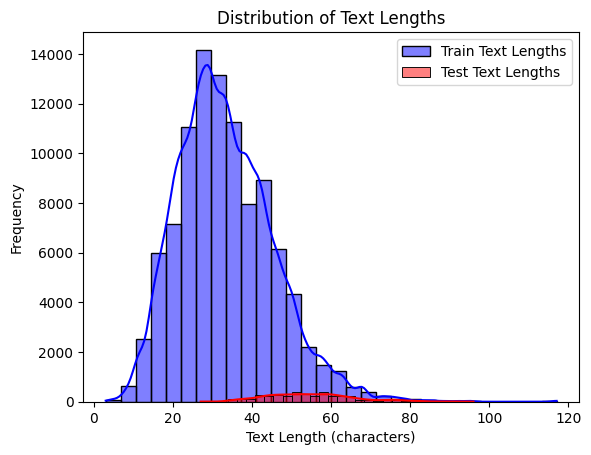

In [5]:
# 2. Text Analysis
# Length distribution of transcriptions
train_text_lengths = [len(text) for text in train_transcriptions.values()]
test_text_lengths = [len(text) for text in test_transcriptions.values()]

sns.histplot(train_text_lengths, bins=30, kde=True, color='blue', label='Train Text Lengths')
sns.histplot(test_text_lengths, bins=30, kde=True, color='red', label='Test Text Lengths')
plt.legend()
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Word frequency distribution
train_words = ' '.join(train_transcriptions.values()).split()
test_words = ' '.join(test_transcriptions.values()).split()

train_word_freq = Counter(train_words)
test_word_freq = Counter(test_words)

common_train_words = train_word_freq.most_common(20)
common_test_words = test_word_freq.most_common(20)

common_train_df = pd.DataFrame(common_train_words, columns=['Word', 'Frequency'])
common_test_df = pd.DataFrame(common_test_words, columns=['Word', 'Frequency'])

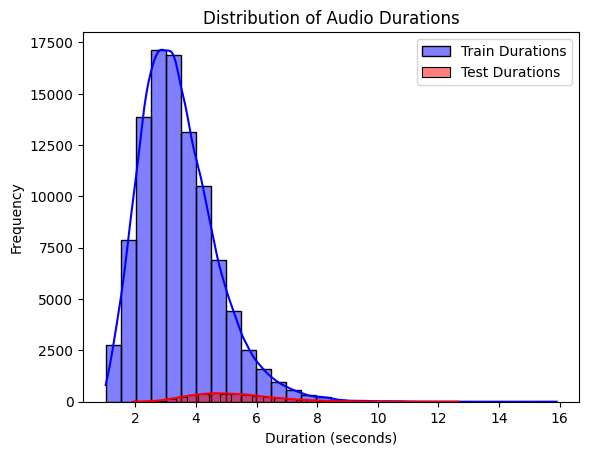

In [9]:
# 3. Audio Analysis
def audio_duration_distribution(audio_dir):
    durations = []
    for file_name in os.listdir(audio_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(audio_dir, file_name)
            audio, sr = librosa.load(file_path, sr=None)
            durations.append(librosa.get_duration(y=audio, sr=sr))
    return durations

train_durations = audio_duration_distribution(os.path.join(train_dir, 'audio'))
test_durations = audio_duration_distribution(os.path.join(test_dir, 'audio'))

sns.histplot(train_durations, bins=30, kde=True, color='blue', label='Train Durations')
sns.histplot(test_durations, bins=30, kde=True, color='red', label='Test Durations')
plt.legend()
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# 5. Data Quality Checks
# Check for missing audio files
missing_train_audio = [id for id in train_transcriptions if f"{id}.wav" not in train_audio_files]
missing_test_audio = [id for id in test_transcriptions if f"{id}.wav" not in test_audio_files]

print(f"Missing train audio files: {missing_train_audio}")
print(f"Missing test audio files: {missing_test_audio}")

Missing train audio files: []
Missing test audio files: []
